# Homework 4
## Matthew Pronyshyn 1002365978

In [1]:
from scipy import stats; 
import numpy as np; 
import matplotlib.pyplot as plt 
import pymc as pm;
import arviz as az

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Part 1, Low number of samples, n = 100

In [17]:
n = 100

loc_true,scale_true,df_true = 10,2,15 # True values data will be from... IRL, we don't know these values
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n) # Data from location-scale-t distribution

In [18]:
model = pm.Model()
with model: 
    scale_prior = pm.HalfNormal('scale_prior', sigma=5)
    loc_prior = pm.Normal('loc_prior', mu=0, sigma=10)
    df_prior = pm.DiscreteUniform('df_prior', lower=1, upper=100)

    x_obs = pm.StudentT('likelihood', nu=df_prior, mu=loc_prior, sigma=scale_prior, observed=x)
    

In [19]:
with model:
    idata_MH = pm.sample()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [scale_prior, loc_prior]
>Metropolis: [df_prior]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.


MH Split-Rhats {'loc_prior': 1.0014, 'df_prior': 1.0011, 'scale_prior': 1.0012}


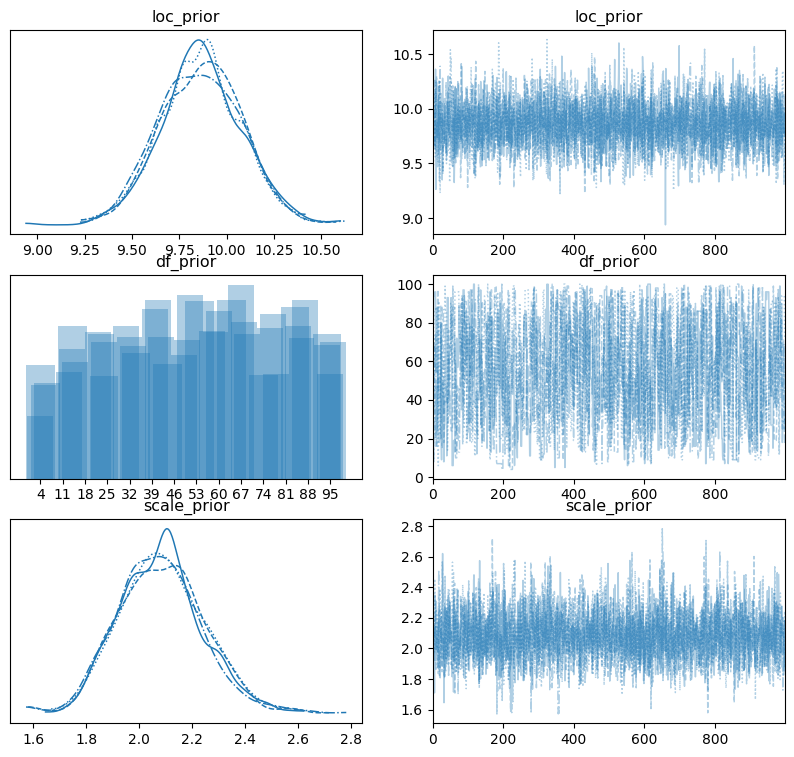

In [20]:
az.plot_trace(idata_MH, figsize=(10, 9));
print('MH Split-Rhats',{k: np.round(v.values,4) for k,v in az.rhat(idata_MH).items()})

In [21]:
az.summary(idata_MH, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc_prior,9.86,0.21,9.46,10.26,0.00,0.00,4068.32,3039.58,1.0
df_prior,56.06,27.00,12.00,99.00,0.93,0.66,808.73,683.37,1.0
scale_prior,2.08,0.16,1.80,2.39,0.00,0.00,3112.28,2641.28,1.0


c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: 

array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

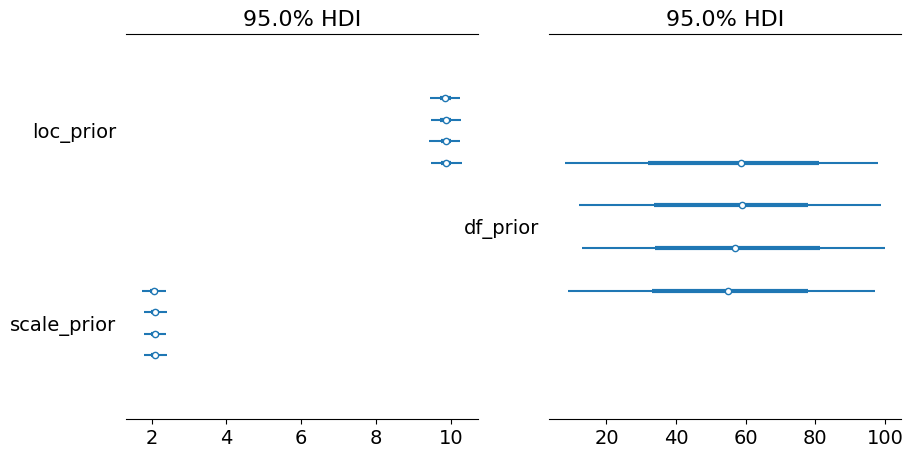

In [22]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
az.plot_forest(idata_MH, var_names=["loc_prior","scale_prior"], combined=False, hdi_prob=0.95,ax=ax[0])
az.plot_forest(idata_MH, var_names=["df_prior"], combined=False, hdi_prob=0.95, ax=ax[1])


## Larger number of samples, n = 10000

In [42]:
n = 10000

loc_true,scale_true,df_true = 10,2,15 # True values data will be from... IRL, we don't know these values
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n) # Data from location-scale-t distribution

model_2 = pm.Model()
with model_2: 
    scale_prior = pm.HalfNormal('scale_prior', sigma=5)
    loc_prior = pm.Normal('loc_prior', mu=0, sigma=10)
    df_prior = pm.DiscreteUniform('df_prior', lower=1, upper=100)

    x_obs = pm.StudentT('likelihood', nu=df_prior, mu=loc_prior, sigma=scale_prior, observed=x)

with model_2:
    idata_MH_2 = pm.sample()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [scale_prior, loc_prior]
>Metropolis: [df_prior]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


MH Split-Rhats {'loc_prior': 1.0003, 'df_prior': 1.0033, 'scale_prior': 1.002}


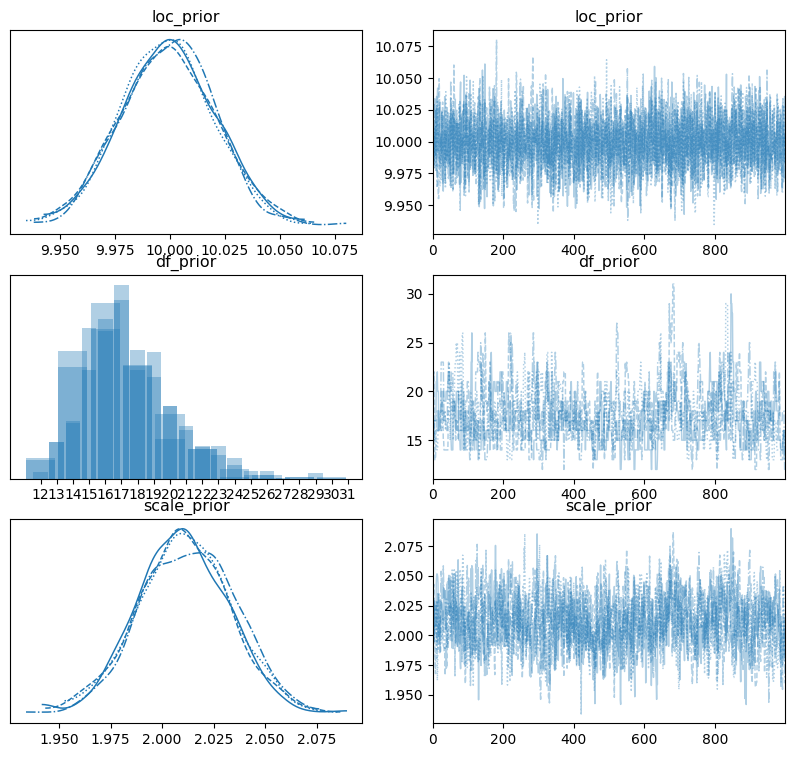

In [43]:
az.plot_trace(idata_MH_2, figsize=(10, 9));
print('MH Split-Rhats',{k: np.round(v.values,4) for k,v in az.rhat(idata_MH_2).items()})

In [44]:
az.summary(idata_MH_2, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc_prior,10.00,0.02,9.96,10.04,0.00,0.00,3630.25,2959.99,1.0
df_prior,17.44,2.73,13.00,22.00,0.15,0.11,325.60,527.99,1.0
scale_prior,2.01,0.02,1.97,2.06,0.00,0.00,475.75,1241.24,1.0


c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: 

[]

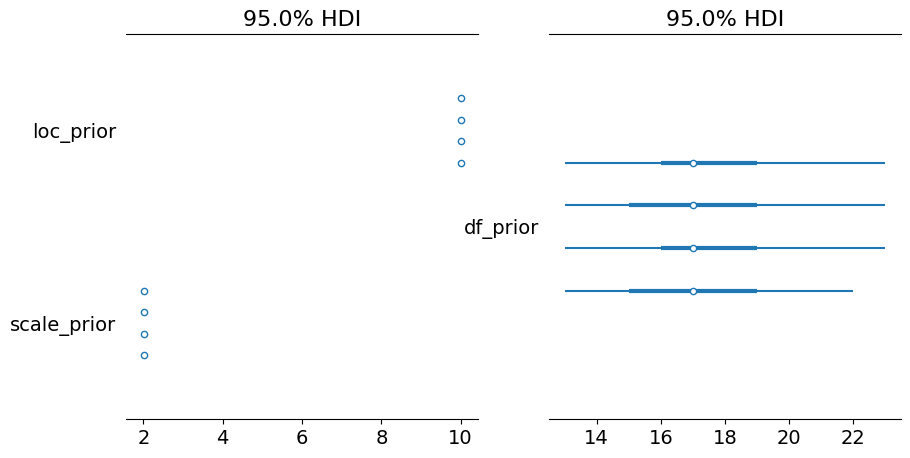

In [48]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
az.plot_forest(idata_MH_2, var_names=["loc_prior","scale_prior"], combined=False, hdi_prob=0.95,ax=ax[0])
az.plot_forest(idata_MH_2, var_names=["df_prior"], combined=False, hdi_prob=0.95, ax=ax[1])


With an initial sample size of 100, our inference for the degrees of freedom parameter was poor, as shown by a 94% credible interval ranging from 12 to 99. This wide interval indicates a high level of uncertainty about the parameter's true value. However, when we increased the sample size to 10,000, the inference accuracy improved significantly. The 94% credible interval narrowed to [13, 22], which closely includes the true value of 15. This improvement in inference occurred despite a reduction in the effective sample size as we increased the sample size.

This counterintuitive outcome suggests that the larger dataset provided more detailed information, leading to a posterior distribution that more accurately reflects the true parameter values. The larger amount of data might have made the posterior distribution too sharp, making it harder for the sampling process to efficiently explore it. Thus, even though the effective sample size was reduced, the inference became more accurate because the posterior distribution was a better representation of the true parameter values.

## Part 2

## a) b)

In [50]:
az.summary(idata_MH, round_to=2)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc_prior,9.86,0.21,9.46,10.26,0.00,0.00,4068.32,3039.58,1.0
df_prior,56.06,27.00,12.00,99.00,0.93,0.66,808.73,683.37,1.0
scale_prior,2.08,0.16,1.80,2.39,0.00,0.00,3112.28,2641.28,1.0


In [49]:
az.summary(idata_MH_2, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc_prior,10.00,0.02,9.96,10.04,0.00,0.00,3630.25,2959.99,1.0
df_prior,17.44,2.73,13.00,22.00,0.15,0.11,325.60,527.99,1.0
scale_prior,2.01,0.02,1.97,2.06,0.00,0.00,475.75,1241.24,1.0


Effective sample sizes in both bulk and tail were low for the degrees of freedom parameter in the low sample size model. 

Effective sample sizes lowered across all parameters in the large sample model, with the scale parameter decreasing the most. 

The convergence measures, split $\hat{R}$, for all parameters in both models are lower than 1.05, meaning convergence has been most likely achieved. 

## c)

No divergences occured in either model.

# d)

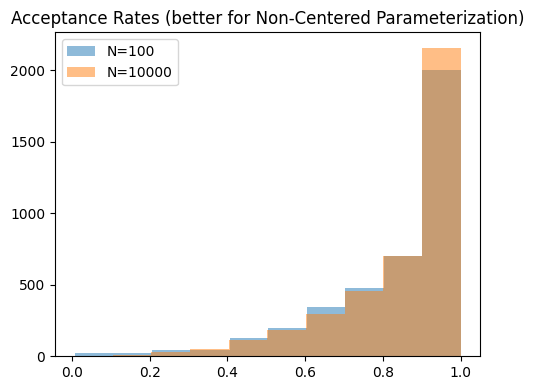

Mean Acceptance Rate for idata_MH: 0.84
Mean Acceptance Rate for idata_MH_2: 0.85


In [55]:
acceptance_rates = idata_MH.sample_stats.acceptance_rate.values.flatten()
acceptance_rates_2 = idata_MH_2.sample_stats.acceptance_rate.values.flatten()

plt.figure(figsize=(5, 4))

plt.hist(acceptance_rates, alpha=0.5,
         label='N=100');
plt.hist(acceptance_rates_2, alpha=0.5,
         label='N=10000');
plt.title('Acceptance Rates (better for Non-Centered Parameterization)'); plt.legend();

plt.tight_layout()
plt.show()
mean_acceptance_rate = np.mean(acceptance_rates)
mean_acceptance_rate_2 = np.mean(acceptance_rates_2)

print("Mean Acceptance Rate for idata_MH:", round(mean_acceptance_rate,2))
print("Mean Acceptance Rate for idata_MH_2:", round(mean_acceptance_rate_2,2))


The acceptance rates are close to the desired 80% for both models. 

## e)
We have a warning for the large sample model saying: "The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation."

## Eight Schools Example

In [56]:
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

with pm.Model() as Centered_eight:

    # We assume the following prior distributions for our parameters
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)

    # and we assume the following probabilistic hierarchy
    # within the data generating mechanism
    theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J) # theta is length J=8

    # Note that if tau was small, then the density evalution above
    # could change rapidly for changes in theta
    # This means that the energy has high curvature

    # likelihood where observed information enters into the model
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

SEED = [20100420, 20134234] # random seeds for each of two run HMC chains
with Centered_eight:
    fit_C = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                      return_inferencedata=True, idata_kwargs={"log_likelihood": True})

with pm.Model() as NonCentered_eight:

    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_t", mu=0, sigma=1, shape=J)
    # Changes in theta now take place on a fixed scale that is independent of tau

    theta = pm.Deterministic("theta", mu + tau * theta_tilde)
    # Changes in tau can still result in rapid changes in the density evaluations
    # below so the energy still has high curvature with respect to tau; but,
    # it no longer has high curvature with respect to theta
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

with NonCentered_eight:
    fit_NC = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                       return_inferencedata=True, idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 15 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta_t]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 12 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


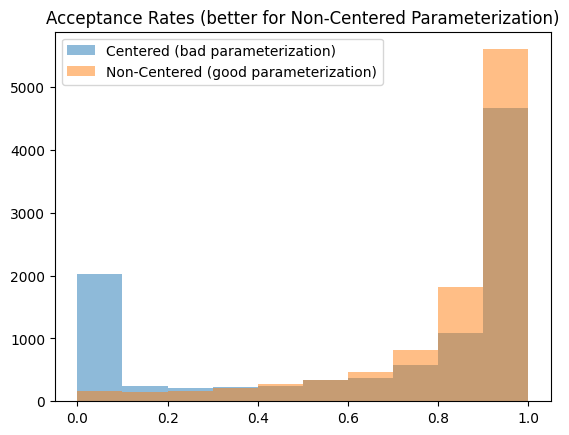

In [57]:
plt.hist(fit_C.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,
         label='Centered (bad parameterization)');
plt.hist(fit_NC.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,
         label='Non-Centered (good parameterization)');
plt.title('Acceptance Rates (better for Non-Centered Parameterization)'); plt.legend();

In [71]:

import pandas as pd
print("Effective Sample Sizes (function of Markov Chain autocorrelation dependency)")
pd.concat(
[pd.DataFrame({'Centered_ess': pm.summary(fit_C)[:1]['ess_bulk'],
              'Non-Centered_ess': pm.summary(fit_NC)['ess_bulk'][:1],
              'Centered_r_hat': pm.summary(fit_C)[:1]['r_hat'],
              'Non-Centered_r_hat': pm.summary(fit_NC)['r_hat'][:1]}),
 pd.DataFrame({'Centered_ess': pm.summary(fit_C)[1:]['ess_bulk'],
              'Non-Centered_ess': pm.summary(fit_NC)['ess_bulk'][9:],
              'Centered_r_hat': pm.summary(fit_C)[1:]['r_hat'],
              'Non-Centered_r_hat': pm.summary(fit_NC)['r_hat'][9:]}),
])

              

Effective Sample Sizes (function of Markov Chain autocorrelation dependency)


,Centered_ess,Non-Centered_ess,Centered_r_hat,Non-Centered_r_hat
mu,586.0,12440.0,1.01,1.0
tau,86.0,5383.0,1.01,1.0
theta[0],1014.0,11002.0,1.00,1.0
theta[1],1028.0,12345.0,1.01,1.0
theta[2],1061.0,11018.0,1.01,1.0
theta[3],1028.0,12615.0,1.01,1.0
theta[4],808.0,12152.0,1.02,1.0
theta[5],927.0,12135.0,1.01,1.0
theta[6],880.0,11465.0,1.01,1.0
theta[7],1059.0,12087.0,1.01,1.0


In [76]:
print("Mean Acceptance Rate for centered model:", round(np.mean(fit_C.sample_stats.acceptance_rate.values.flatten()),2))
print("Mean Acceptance Rate for non-centered model:", round(np.mean(fit_NC.sample_stats.acceptance_rate.values.flatten()),2))

Mean Acceptance Rate for centered model: 0.66
Mean Acceptance Rate for non-centered model: 0.83


## a) - e)

The effective sample sizes of the parameters shows that the non-centered model did a much better job at exploring the posterior distribution. The centered model took much smaller steps when exploring and also diverged 529 times relative to the 5 times of the non-centered model. The convergence of the non-centered model was also better with all values being closer to 1.0. Additionally the mean acceptance rate was much closer to the ideal rate of 80%, the non-centered being 83% relative to 66%. Finally, Pymc recommended running at least 4 chains for robust computation of convergence diagnostics.


The non-centered parameterization works better for HMC sampling than the "centered" parameterization because it flattens out the exessive curvature in the energy function of the centered model. In a centered model, a small $\tau$ can make it so that the previous $\theta$'s density evaluates to essentially zero causing a divergence and inefficient sampling. The non-centered approach smooths out these drastic changes by using an intermediary step in the calculations, making it easier for HMC to explore different possibilities without getting stuck, which ultimately improves the algorithm's ability to learn about the model's parameters efficiently.

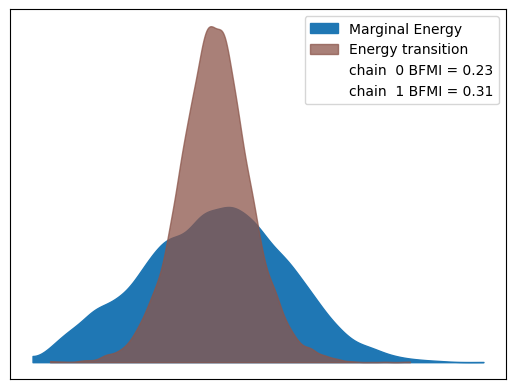

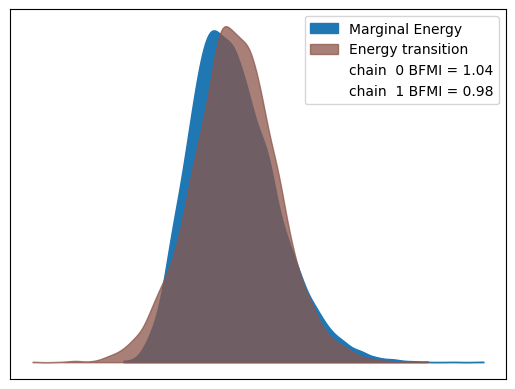

In [77]:
az.plot_energy(fit_C);
az.plot_energy(fit_NC);

 An energy plot is a way of checking if the algorithm was able to adequately explore the posterior distribution. If it was not, the risk of biased posterior estimates is higher when parts of the posterior are not visited with adequate frequency. Here we can see that the first plot, centered model, did not do a good job of exploring the posterior distribution as the marginal energy and energy transition curves do not match up. In the second plot, non-centered model, the two curves match up well which backs up the previous analysis. We can be confident the non-centered model explored the posterior distribution well.